1. Implementar una función en Python que calcule el máximo y el mínimo valor de un
arreglo de double.Retornar ambos valores en un arreglo.

In [81]:
def min_max_double(arr):
    if arr.size == 0:
        return []

    min_val = max_val = arr[0]

    for num in arr:
        if num < min_val:
            min_val = num
        if num > max_val:
            max_val = num

    return [min_val, max_val]

In [82]:
%%file lib_min_max_double.c

void min_max_array_double(double arr[], int size, double result[]) {
    double min_value = arr[0];
    double max_value = arr[0];
    
    for (int i = 1; i < size; i++) {
        if (arr[i] < min_value) {
            min_value = arr[i];
        }
        if (arr[i] > max_value) {
            max_value = arr[i];
        }
    }
    result[0] = min_value;
    result[1] = max_value;
}


Overwriting lib_min_max_double.c


In [83]:
!gcc -c lib_min_max_double.c
!gcc -shared lib_min_max_double.o -o lib_min_max_double.so

3. Haciendo uso de la librería de ctypes, realizar un análisis temporal de 50 iteraciones
probando sus funciones para un arreglo de N = 1024 elementos.


In [84]:
import ctypes
import numpy as np
import time

lib = ctypes.CDLL("./lib_min_max_double.so")
lib.min_max_array_double.restype = None
lib.min_max_array_double.argtypes = [ctypes.POINTER(ctypes.c_double), ctypes.c_int, ctypes.POINTER(ctypes.c_double)]

def funcion_double():
    return lib.min_max_array_double, (ctypes.c_double * 2)()          

In [85]:
min_max_double_c, rpta_double_c = funcion_double() 

In [86]:
def calcular_tiempo():
    N = 1024
    iterations = 50
    arr = np.random.uniform(low=0.0, high=10.0, size=N).astype(np.float64)  # Cambio a np.float64

    c_start_time = time.time()
    for i in range(iterations):
        rpta_c = (ctypes.c_double * 2)()  # Cambio a c_double
        min_max_double_c(arr.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), N, rpta_c)
    c_end_time = time.time()
    c_average_time = (c_end_time - c_start_time)/iterations

    py_start_time = time.time()
    for i in range(iterations):
        rpta_py = min_max_double(arr)
    py_end_time = time.time()
    py_average_time = (py_end_time - py_start_time)/iterations

    # Extract numeric values from the C result
    c_result = [rpta_c[i] for i in range(2)]

    print(f"Tiempo de ejecución promedio en double C : {c_average_time} s")
    print(f"Tiempo de ejecución promedio en double Python : {py_average_time} s")
    print(f"Respuesta de double C: {c_result}")
    print(f"Respuesta de double Python: {rpta_py}")

In [87]:
calcular_tiempo()

Tiempo de ejecución promedio en double C : 4.715442657470703e-05 s
Tiempo de ejecución promedio en double Python : 0.0003489065170288086 s
Respuesta de double C: [0.003438155310737656, 9.98223475016514]
Respuesta de double Python: [0.003438155310737656, 9.98223475016514]


4. Realizar el análisis temporal para N = 512, 1024, 2048, 4096 y 8192

In [88]:
def calcular_tiempo2(N, python_times, c_times):
    iterations = 50
    arr = np.random.uniform(low=0.0, high=10.0, size=N).astype(np.float64)

    c_start_time = time.time()
    for i in range(iterations):
        rpta_c = (ctypes.c_double* 2)()
        min_max_double_c(arr.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), N, rpta_c)
    c_end_time = time.time()
    c_average_time = (c_end_time - c_start_time)/iterations
    c_times.append(c_average_time)

    py_start_time = time.time()
    for i in range(iterations):
        rpta_py = min_max_double(arr)
    py_end_time = time.time()
    py_average_time = (py_end_time - py_start_time) /iterations
    python_times.append(py_average_time)

    # Extract numeric values from the C result
    c_result = [rpta_c[i] for i in range(2)]

    print(f"RESULTADOS PARA {N}:")
    print(f"Tiempo de ejecución promedio en double C : {np.mean(c_times)} s")
    print(f"Tiempo de ejecución promedio en double Python : {np.mean(python_times)} s")
    print(f"Respuesta de double C: {c_result}")
    print(f"Respuesta de double Python: {rpta_py}")

In [89]:
import  matplotlib.pyplot as plt

python_times = []
c_times = []
values = [512, 1024, 2048, 4096, 8192]
for N in values:
    calcular_tiempo2(N, python_times, c_times)  

RESULTADOS PARA 512:
Tiempo de ejecución promedio en double C : 4.073619842529297e-05 s
Tiempo de ejecución promedio en double Python : 0.00012941360473632811 s
Respuesta de double C: [0.014789592425917819, 9.985537706283736]
Respuesta de double Python: [0.014789592425917819, 9.985537706283736]
RESULTADOS PARA 1024:
Tiempo de ejecución promedio en double C : 6.0646533966064454e-05 s
Tiempo de ejecución promedio en double Python : 0.00022498607635498046 s
Respuesta de double C: [0.006120860906230208, 9.999456420281128]
Respuesta de double Python: [0.006120860906230208, 9.999456420281128]
RESULTADOS PARA 2048:
Tiempo de ejecución promedio en double C : 5.5084228515625e-05 s
Tiempo de ejecución promedio en double Python : 0.0002942450841267904 s
Respuesta de double C: [0.005842685382768664, 9.999236981429947]
Respuesta de double Python: [0.005842685382768664, 9.999236981429947]
RESULTADOS PARA 4096:
Tiempo de ejecución promedio en double C : 5.291461944580078e-05 s
Tiempo de ejecución pro

RESULTADOS PARA 8192:
Tiempo de ejecución promedio en double C : 5.7227134704589835e-05 s
Tiempo de ejecución promedio en double Python : 0.0008243026733398438 s
Respuesta de double C: [0.00012226290267314255, 9.999025913252181]
Respuesta de double Python: [0.00012226290267314255, 9.999025913252181]


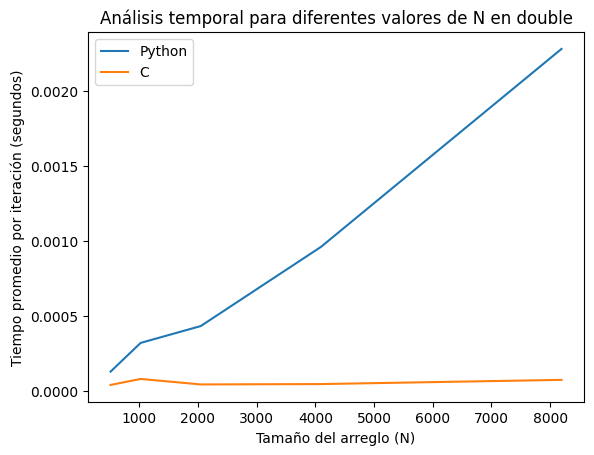

In [90]:
plt.plot(values, python_times, label='Python')
plt.plot(values, c_times, label='C')
plt.xlabel('Tamaño del arreglo (N)')
plt.ylabel('Tiempo promedio por iteración (segundos)')
plt.title('Análisis temporal para diferentes valores de N en double')
plt.legend()
plt.show()

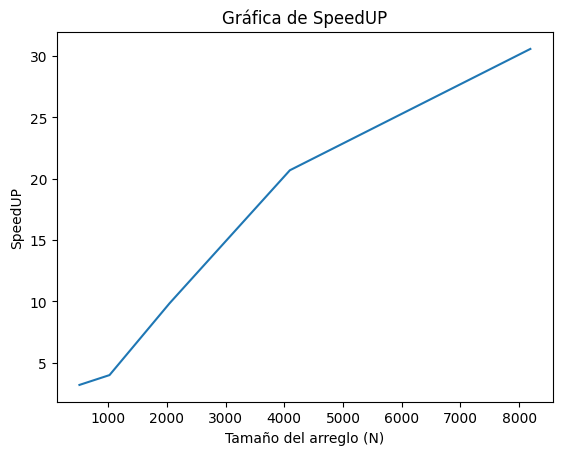

In [91]:
speedup = [python_time / c_time for python_time, c_time in zip(python_times, c_times)]

plt.plot(values, speedup)
plt.xlabel('Tamaño del arreglo (N)')
plt.ylabel('SpeedUP')
plt.title('Gráfica de SpeedUP')
plt.show()